# Market Price Prediction

**Project Done By:**    **MAHAMMAD BASHEER K S, E-mail: bacchianc@gmail.com**  

**DATE:**    ***26-05-2024***

### Objective:
The primary objective of this project is to develop a robust time series machine learning model capable of
accurately forecasting market trends based on historical data. By leveraging advanced algorithms, we aim
to predict the quantity and prices of commodities for future months, empowering stakeholders to make
proactive decisions regarding production, procurement, pricing strategies, and resource allocation.
Data Description:
The dataset comprises the following columns:
-  market: The market or commodity under consideration.
- month: The month for which the data is recorded.
- year: The year corresponding to the recorded data.
- quantity: The quantity of the commodity traded or available.
- priceMin: The minimum price of the commodity during the month.
- priceMax: The maximum price of the commodity during the month.
- priceMod: The mode or most frequently occurring price of the commodity during the month.
- state: The state or region where the market is located.
- city: The city where the market is situated.
- date: The specific date of the recorded data.

### Task:
The task involves several key steps:
1. Data Preprocessing: Cleaning the dataset, handling missing values, and encoding categorical variables.
2. Exploratory Data Analysis (EDA): Analyzing the temporal patterns, identifying seasonality, trends, and
anomalies within the data.
3. Feature Engineering: Creating relevant features such as lagged variables, rolling statistics, and seasonal
indicators.
4. Model Selection and Training: Evaluating various time series forecasting models such as ARIMA,
SARIMA, Prophet, and LSTM, selecting the most suitable one, and training it on the dataset.
5. Model Evaluation: Assessing the model's performance using appropriate metrics such as Mean Absolute
Error (MAE), Mean Squared Error (MSE), and Root Mean Squared Error (RMSE).
6. Fine-tuning and Validation: Fine-tuning the model parameters, validating its performance on unseen
data, and iterating if necessary.

### Outcome:
The ultimate goal is to deploy a production-ready machine learning model capable of generating accurate
forecasts for market quantity and prices for future months. The insights derived from this model will aid
stakeholders in making data-driven decisions, optimizing inventory management, pricing strategies, and
resource allocation, thereby enhancing overall efficiency and profitability in the market ecosystem.

## Importing Libraries

In [1]:
#Lets import Important libraries

import numpy as np
import pandas as pd
import pandas_datareader as pdr

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import plotly.express as px

from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Loading the dataset
data=pd.read_csv('MarketPricePrediction.csv')

In [3]:
data.head(10)

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city,date
0,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR,January-2005
1,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR,January-2006
2,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR,January-2010
3,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR,January-2011
4,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR,January-2012
5,ABOHAR(PB),January,2013,675,1327,1900,1605,PB,ABOHAR,January-2013
6,ABOHAR(PB),January,2014,440,1025,1481,1256,PB,ABOHAR,January-2014
7,ABOHAR(PB),January,2015,1305,1309,1858,1613,PB,ABOHAR,January-2015
8,ABOHAR(PB),February,2005,1400,286,365,324,PB,ABOHAR,February-2005
9,ABOHAR(PB),February,2006,1800,343,411,380,PB,ABOHAR,February-2006


In [4]:
data.shape

(10227, 10)

In [5]:
# Checking for missing values in the training dataset
data.isnull().sum()

market      0
month       0
year        0
quantity    0
priceMin    0
priceMax    0
priceMod    0
state       0
city        0
date        0
dtype: int64

In [6]:
# Displaying information about the training dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    10227 non-null  object
 1   month     10227 non-null  object
 2   year      10227 non-null  int64 
 3   quantity  10227 non-null  int64 
 4   priceMin  10227 non-null  int64 
 5   priceMax  10227 non-null  int64 
 6   priceMod  10227 non-null  int64 
 7   state     10227 non-null  object
 8   city      10227 non-null  object
 9   date      10227 non-null  object
dtypes: int64(5), object(5)
memory usage: 799.1+ KB


In [7]:
data['date']=pd.to_datetime(data['date'])

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10227 entries, 0 to 10226
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   market    10227 non-null  object        
 1   month     10227 non-null  object        
 2   year      10227 non-null  int64         
 3   quantity  10227 non-null  int64         
 4   priceMin  10227 non-null  int64         
 5   priceMax  10227 non-null  int64         
 6   priceMod  10227 non-null  int64         
 7   state     10227 non-null  object        
 8   city      10227 non-null  object        
 9   date      10227 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(5), object(4)
memory usage: 799.1+ KB


Successfully the date columns datatype changed from object to datetime64

In [9]:
data.set_index('date',inplace=True)

In [10]:
data

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2005-01-01,ABOHAR(PB),January,2005,2350,404,493,446,PB,ABOHAR
2006-01-01,ABOHAR(PB),January,2006,900,487,638,563,PB,ABOHAR
2010-01-01,ABOHAR(PB),January,2010,790,1283,1592,1460,PB,ABOHAR
2011-01-01,ABOHAR(PB),January,2011,245,3067,3750,3433,PB,ABOHAR
2012-01-01,ABOHAR(PB),January,2012,1035,523,686,605,PB,ABOHAR
...,...,...,...,...,...,...,...,...,...
2011-12-01,YEOLA(MS),December,2011,131326,282,612,526,MS,YEOLA
2012-12-01,YEOLA(MS),December,2012,207066,485,1327,1136,MS,YEOLA
2013-12-01,YEOLA(MS),December,2013,215883,472,1427,1177,MS,YEOLA


In [11]:
data.sort_index(inplace=True)

In [12]:
data.nunique()

market       120
month         12
year          21
quantity    8641
priceMin    2026
priceMax    2732
priceMod    2424
state         21
city         117
dtype: int64

In [13]:
data['city'].value_counts()

city
LASALGAON        242
PIMPALGAON       224
MANMAD           218
LONAND           211
MAHUVA           210
                ... 
SRIGANGANAGAR      1
MEERUT             1
CHALLAKERE         1
RAJAHMUNDRY        1
NEEMUCH            1
Name: count, Length: 117, dtype: int64

In [14]:
city_name='LASALGAON'

In [15]:
df=data[data['city']==city_name]

In [16]:
df.shape

(242, 9)

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 242 entries, 1996-01-01 to 2016-02-01
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   market    242 non-null    object
 1   month     242 non-null    object
 2   year      242 non-null    int64 
 3   quantity  242 non-null    int64 
 4   priceMin  242 non-null    int64 
 5   priceMax  242 non-null    int64 
 6   priceMod  242 non-null    int64 
 7   state     242 non-null    object
 8   city      242 non-null    object
dtypes: int64(5), object(4)
memory usage: 18.9+ KB


<Figure size 2000x1200 with 0 Axes>

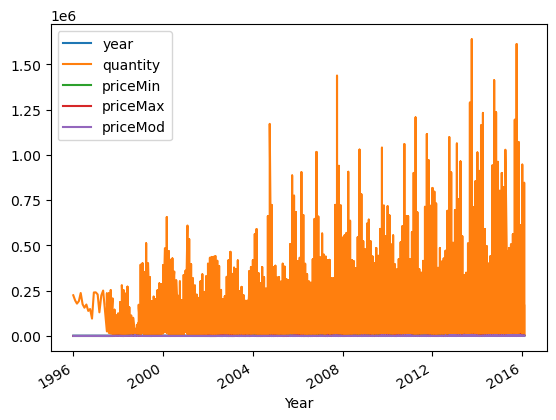

In [18]:
plt.figure(figsize=(20,12),facecolor='green')
data.plot(xlabel='Year')
plt.show()

<Axes: xlabel='date'>

<Figure size 2000x1400 with 0 Axes>

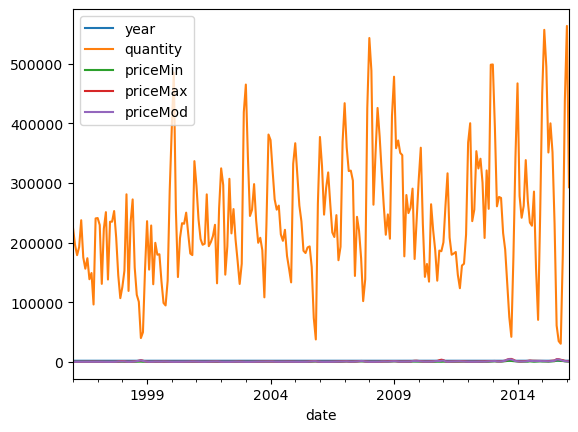

In [19]:
plt.figure(figsize=(20,14))
df.plot()

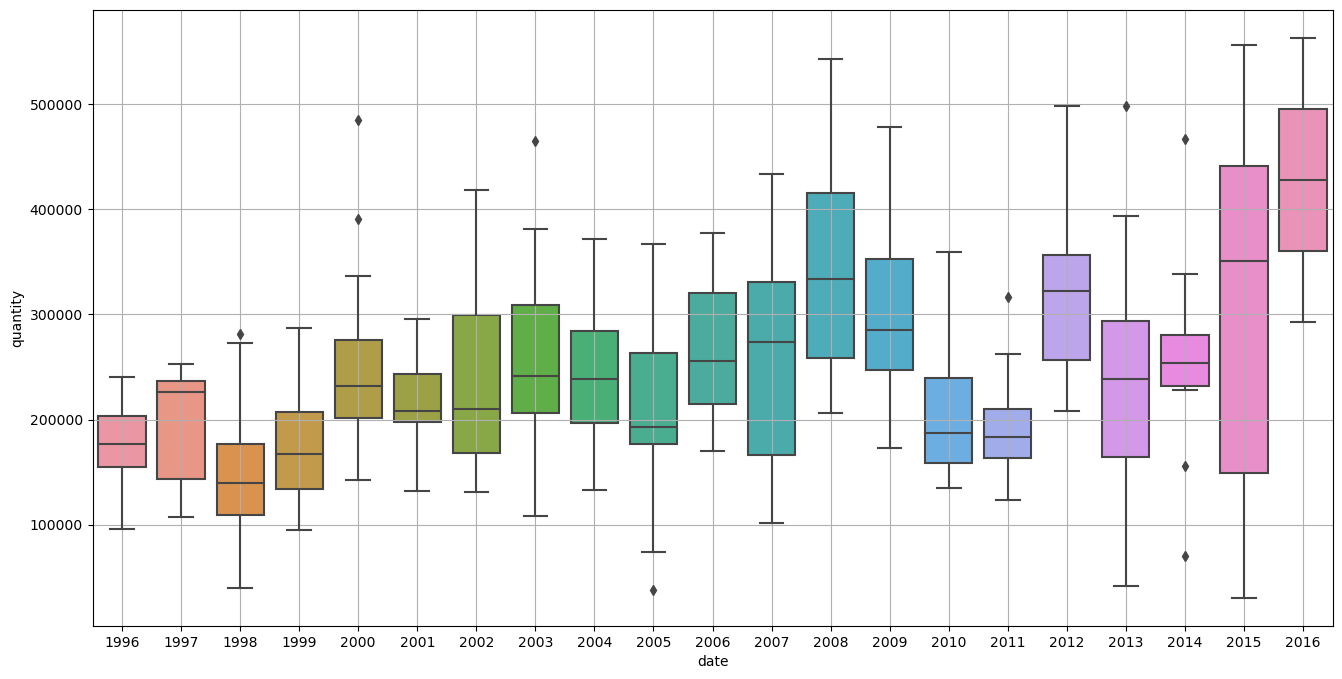

In [20]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df.index.year,y=df['quantity'])
plt.grid()
plt.savefig('boxplot_quantity_by_year.png')
plt.show()

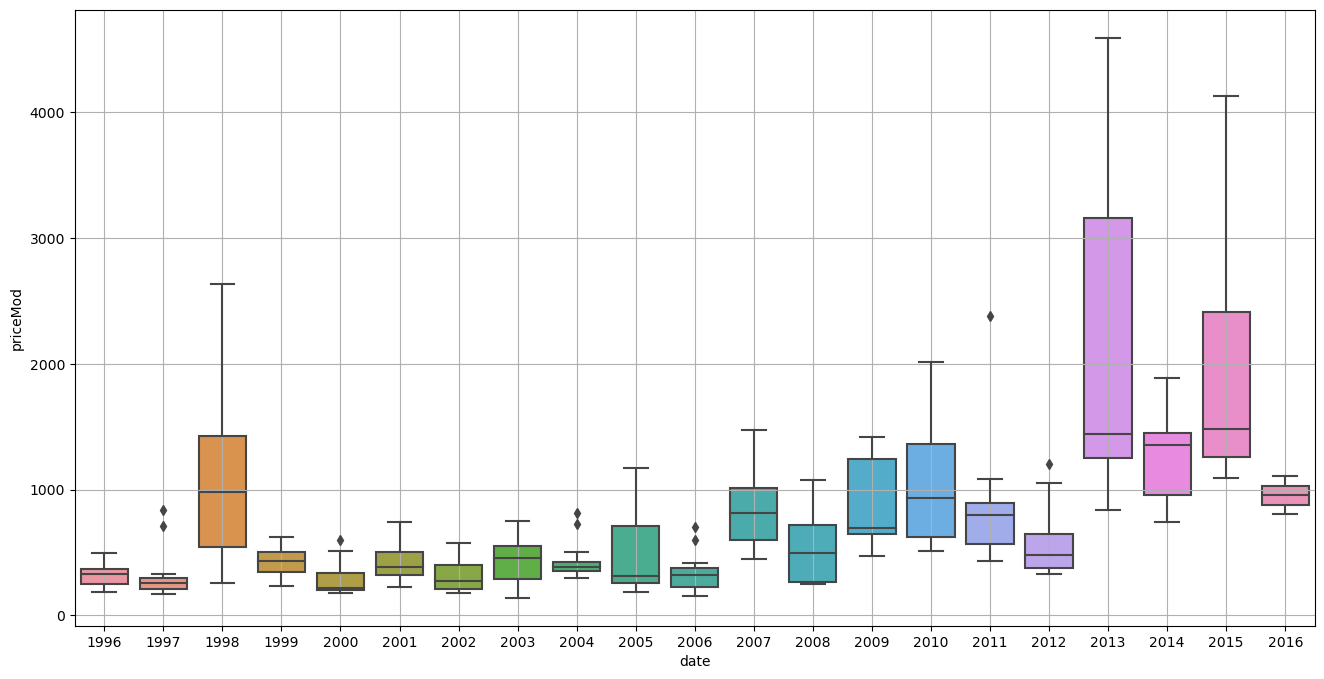

In [21]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df.index.year,y=df['priceMod'])
plt.savefig('boxplot_priceMod_by_year.png')
plt.grid()

In [22]:
df.shape

(242, 9)

In [23]:
# Deal with outliers

def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

# Removing outliers from 'quantity' and 'priceMod'
df = remove_outliers(df, 'quantity')
df = remove_outliers(df, 'priceMod')

In [24]:
df.shape

(219, 9)

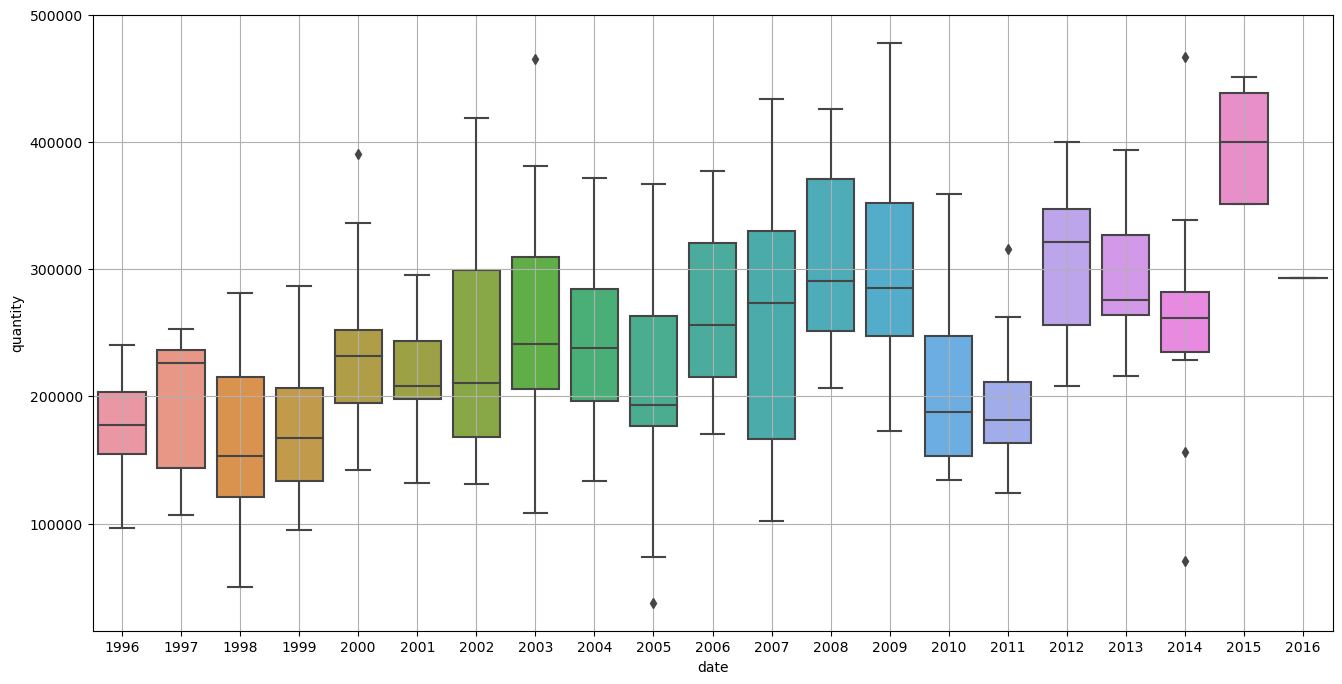

In [25]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df.index.year,y=df['quantity'])
plt.grid()
plt.savefig('boxplot_quantity_by_year.png')
plt.show()

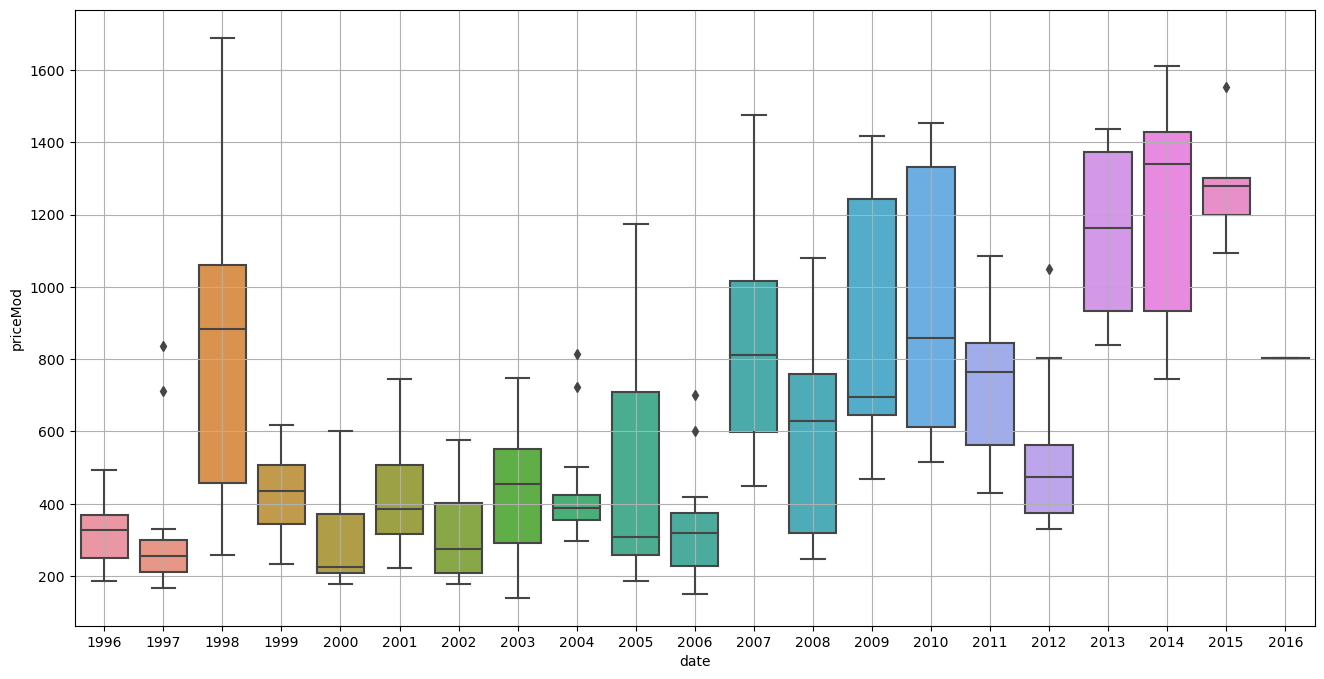

In [26]:
plt.figure(figsize=(16,8))
sns.boxplot(x=df.index.year,y=df['priceMod'])
plt.savefig('boxplot_priceMod_by_year.png')
plt.grid()

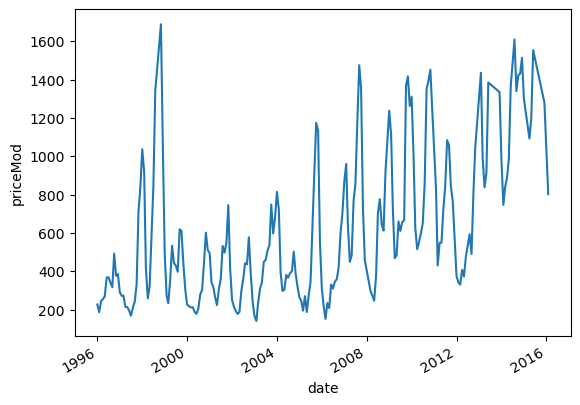

In [27]:
df['priceMod'].plot(ylabel='priceMod')
plt.savefig('lineplot_priceMod_by_year.png')

In [28]:
start_date=df.index.min()
end_date=df.index.max()
print("Start Date: ",start_date.date())
print("End Date: ",end_date.date())

Start Date:  1996-01-01
End Date:  2016-02-01


In [29]:
train_df=df.iloc[:200]

In [30]:
train_df.shape

(200, 9)

In [31]:
train_df

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
1996-01-01,LASALGAON(MS),January,1996,225063,160,257,226,MS,LASALGAON
1996-02-01,LASALGAON(MS),February,1996,196164,133,229,186,MS,LASALGAON
1996-03-01,LASALGAON(MS),March,1996,178992,155,274,243,MS,LASALGAON
1996-04-01,LASALGAON(MS),April,1996,192592,136,279,254,MS,LASALGAON
1996-05-01,LASALGAON(MS),May,1996,237574,154,312,269,MS,LASALGAON
...,...,...,...,...,...,...,...,...,...
2012-11-01,LASALGAON(MS),November,2012,256677,327,1357,1049,MS,LASALGAON
2013-02-01,LASALGAON(MS),February,2013,393745,958,1598,1436,MS,LASALGAON
2013-03-01,LASALGAON(MS),March,2013,260887,664,1128,992,MS,LASALGAON


In [32]:
test_df=df.iloc[200:]

In [33]:
test_df.shape

(19, 9)

In [34]:
test_df

,market,month,year,quantity,priceMin,priceMax,priceMod,state,city
date,,,,,,,,,
2013-06-01,LASALGAON(MS),June,2013,216030,806,1544,1385,MS,LASALGAON
2013-12-01,LASALGAON(MS),December,2013,343533,955,1690,1335,MS,LASALGAON
2014-01-01,LASALGAON(MS),January,2014,467015,774,1220,978,MS,LASALGAON
2014-02-01,LASALGAON(MS),February,2014,278214,469,831,746,MS,LASALGAON
2014-03-01,LASALGAON(MS),March,2014,241705,470,966,837,MS,LASALGAON
2014-04-01,LASALGAON(MS),April,2014,261547,306,1344,888,MS,LASALGAON
2014-05-01,LASALGAON(MS),May,2014,338372,300,1461,988,MS,LASALGAON
2014-06-01,LASALGAON(MS),June,2014,270205,453,1767,1367,MS,LASALGAON
2014-08-01,LASALGAON(MS),August,2014,228355,589,2005,1610,MS,LASALGAON


In [35]:
train=train_df[['priceMod']]
test=test_df[['priceMod']]

In [36]:
rol_mean=train.rolling(7).mean()

In [37]:
rol_std=train.rolling(7).std()

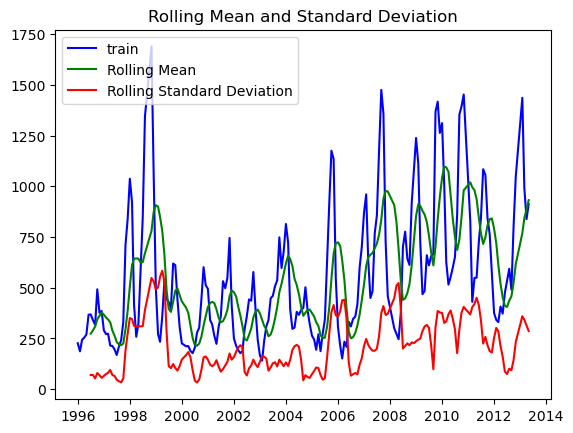

In [38]:
plt.plot(train,c='blue',label='train')
plt.plot(rol_mean, c='green',label='Rolling Mean')
plt.plot(rol_std,c='red',label='Rolling Standard Deviation')
plt.legend(loc='best')
plt.title('Rolling Mean and Standard Deviation')
plt.savefig('Rolling Mean and Standard Deviation.png')
plt.show()

**Trend Analysis:**

There is an upward trend in the data over the period, especially noticeable from the early 2000s onwards. This indicates that the quantity being measured generally increased over time.
Seasonal Patterns:

The time series exhibits strong seasonal patterns with periodic spikes, suggesting regular fluctuations that might be linked to specific times of the year or recurring events.

**Rolling Mean:**

The rolling mean (green line) smooths out the short-term fluctuations and highlights the overall trend. The rolling mean increases over time, corroborating the upward trend observed in the raw data.
Rolling Standard Deviation:

The rolling standard deviation (red line) shows periods of higher and lower variability.
The variability increases significantly around the early 2000s and continues to show high variability throughout the rest of the period. This indicates that while the quantity increases over time, the fluctuations around the mean also become more pronounced.

**Stability Periods:**

From around 1996 to 1999, the rolling mean and standard deviation are relatively stable, suggesting less variability in the early period.
Post-2000, both the rolling mean and standard deviation rise, indicating increased activity and variability.

In [39]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

print('Examples of parameter combinations for Seasonal ARIMA...')
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[1]))
print('SARIMAX: {} x {}'.format(pdq[1], seasonal_pdq[2]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[3]))
print('SARIMAX: {} x {}'.format(pdq[2], seasonal_pdq[4]))

Examples of parameter combinations for Seasonal ARIMA...
SARIMAX: (0, 0, 1) x (0, 0, 1, 12)
SARIMAX: (0, 0, 1) x (0, 1, 0, 12)
SARIMAX: (0, 1, 0) x (0, 1, 1, 12)
SARIMAX: (0, 1, 0) x (1, 0, 0, 12)


In [40]:
from statsmodels.tsa.arima.model import ARIMA

#df_arima is difining as an empty DataFrame with columns 'param' and 'AIC'
df_arima = pd.DataFrame(columns=['param', 'AIC'])

for param in pdq:
    mod = ARIMA(train['priceMod'], order=param)
    results_ARIMA = mod.fit()
    print('ARIMA{}-AIC:{}'.format(param, results_ARIMA.aic))
    df_arima = pd.concat([df_arima, pd.DataFrame({'param': [param], 'AIC': [results_ARIMA.aic]})], ignore_index=True)

C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 0)-AIC:2893.6279418007007


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


ARIMA(0, 0, 1)-AIC:2721.6101510658013
ARIMA(0, 1, 0)-AIC:2661.5867268481666
ARIMA(0, 1, 1)-AIC:2631.71564703294
ARIMA(1, 0, 0)-AIC:2662.506394389196


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

ARIMA(1, 0, 1)-AIC:2622.3552603297926
ARIMA(1, 1, 0)-AIC:2635.986612222729


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

ARIMA(1, 1, 1)-AIC:2633.0443106283847


In [41]:
# ARIMA ((1, 0, 1)) has the lowest AIC
model = ARIMA(train['priceMod'], order=(1, 0, 1), enforce_stationarity=False, enforce_invertibility=False)
results_ARIMA = model.fit()
print(results_ARIMA.summary())

C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:               priceMod   No. Observations:                  200
Model:                 ARIMA(1, 0, 1)   Log Likelihood               -1293.853
Date:                Thu, 30 May 2024   AIC                           2595.706
Time:                        13:05:21   BIC                           2608.859
Sample:                             0   HQIC                          2601.030
                                - 200                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        548.5806     91.290      6.009      0.000     369.655     727.507
ar.L1          0.7278      0.053     13.809      0.000       0.625       0.831
ma.L1          0.4567      0.070      6.501      0.0

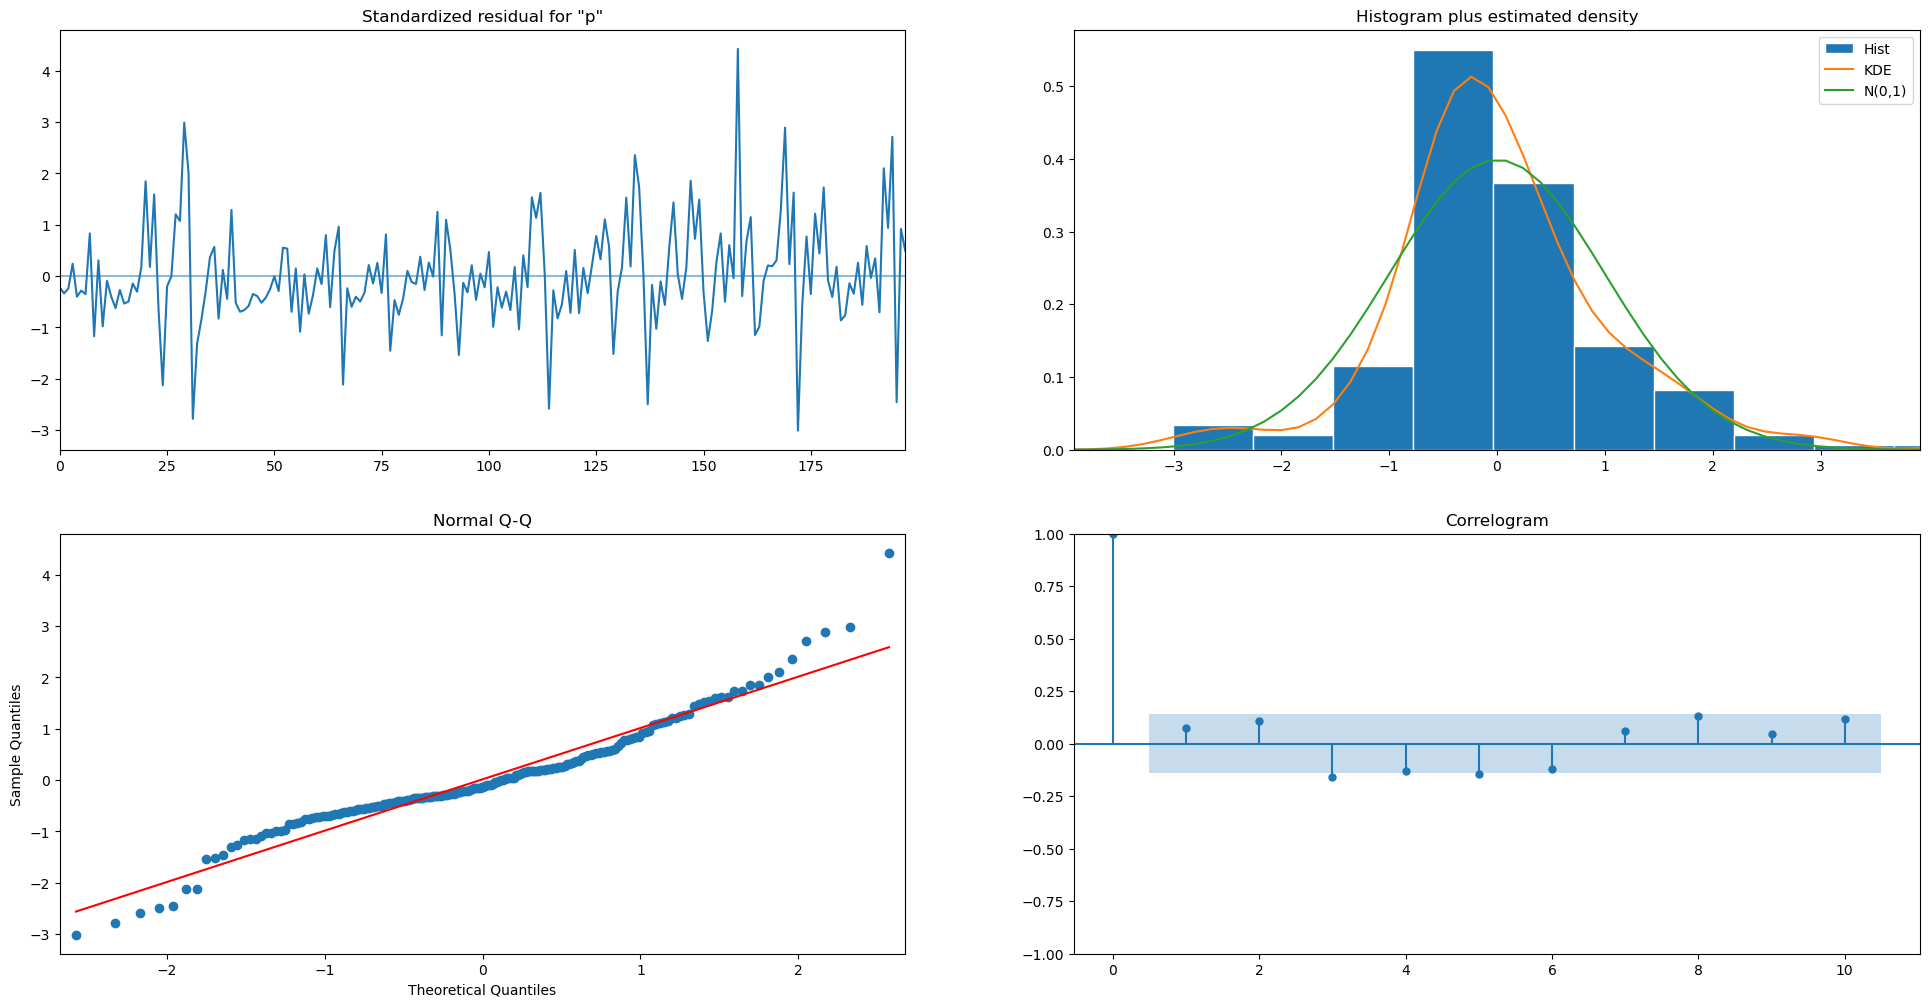

In [42]:
results_ARIMA.plot_diagnostics(figsize=(24,12))
plt.savefig('ARIMA_Result.png')
plt.show()

### Insights and Notes on ARIMA Model Diagnostics

This image shows four diagnostic plots for an ARIMA model applied to a time series dataset. These plots help evaluate the fit and assumptions of the ARIMA model. Let's analyze each plot:

1. **Standardized Residuals (Top Left)**:
   - **Description**: This plot shows the standardized residuals over time.
   - **Insights**:
     - Residuals should ideally be randomly scattered around zero with no discernible pattern.
     - The residuals in this plot appear to fluctuate around zero without any obvious trends, suggesting that the ARIMA model has captured the main structure of the time series.
     - There are a few spikes, but they are within acceptable limits, indicating occasional larger deviations but no systematic issues.

2. **Histogram plus Estimated Density (Top Right)**:
   - **Description**: This plot shows the histogram of the residuals with a Kernel Density Estimate (KDE) overlaid and a normal distribution for comparison.
   - **Insights**:
     - Residuals should ideally follow a normal distribution (bell-shaped curve).
     - The KDE (orange line) and the normal distribution (green line) show that the residuals are approximately normally distributed, though there is some skewness to the left.
     - The presence of some deviation from the normal distribution suggests there might be some minor issues with the model, but overall it is acceptable.

3. **Normal Q-Q Plot (Bottom Left)**:
   - **Description**: This plot compares the quantiles of the residuals to the quantiles of a standard normal distribution.
   - **Insights**:
     - Points should lie on the red line if the residuals are normally distributed.
     - Most points lie close to the line, but there are deviations at the tails, indicating some outliers or heavier tails than the normal distribution.
     - The Q-Q plot confirms the slight deviation from normality observed in the histogram.

4. **Correlogram (ACF of Residuals, Bottom Right)**:
   - **Description**: This plot shows the autocorrelation function (ACF) of the residuals.
   - **Insights**:
     - Ideally, residuals should have no significant autocorrelation, meaning they are not correlated with their own past values.
     - Most lags fall within the blue confidence intervals, suggesting no significant autocorrelation.
     - The lack of significant autocorrelation in residuals indicates that the ARIMA model has adequately captured the autocorrelation structure of the time series.

### Summary:
Overall, the diagnostic plots suggest that the ARIMA model is a reasonable fit for the data:

- The standardized residuals fluctuate randomly around zero.
- The histogram and Q-Q plot indicate that residuals are approximately normally distributed with some minor deviations.
- The correlogram shows no significant autocorrelation in the residuals, indicating that the model has captured the underlying autocorrelation structure of the data.

In [43]:
final_hat_avg=test.copy()
pred_ARIMA=results_ARIMA.get_forecast(steps=len(test))
pred_ARIMA.predicted_mean

C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


200    850.865233
201    768.588282
202    708.705774
203    665.122308
204    633.401550
205    610.314665
206    593.511654
207    581.282147
208    572.381313
209    565.903141
210    561.188222
211    557.756626
212    555.259055
213    553.441282
214    552.118278
215    551.155373
216    550.454555
217    549.944489
218    549.573254
Name: predicted_mean, dtype: float64

In [44]:
from sklearn.metrics import mean_squared_error,root_mean_squared_error,mean_absolute_error

In [45]:
MSE_ARIMA=mean_squared_error(test.priceMod,pred_ARIMA.predicted_mean,squared=False)
MSE_ARIMA

670.8473719344744

In [46]:
RMSE_ARIMA=root_mean_squared_error(test.priceMod,pred_ARIMA.predicted_mean)
RMSE_ARIMA

670.8473719344744

In [47]:
from math import sqrt
sqrt(MSE_ARIMA)

25.900721455868258

In [48]:
MAE_ARIMA=mean_absolute_error(test.priceMod,pred_ARIMA.predicted_mean)
MAE_ARIMA

607.317515617107

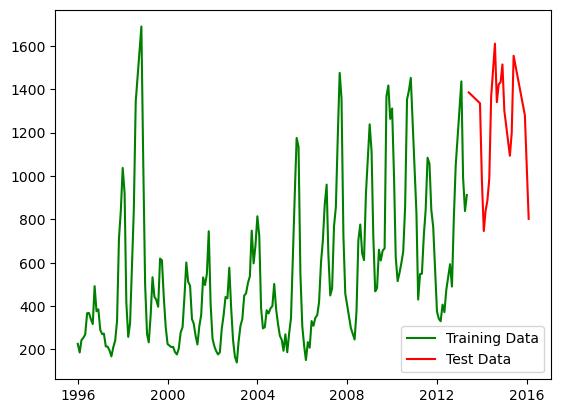

In [49]:
plt.plot(train,label='Training Data',c='green')
plt.plot(test,label='Test Data',c='red')
plt.legend(loc='best')
plt.show()

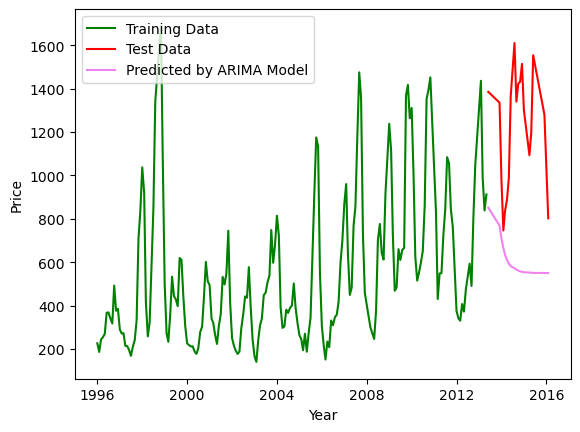

In [50]:
plt.plot(train,label='Training Data',c='green')
plt.plot(test,label='Test Data',c='red')
plt.plot(test.index,pred_ARIMA.predicted_mean,label='Predicted by ARIMA Model',c='violet')
plt.legend(loc='best')
plt.xlabel('Year')
plt.ylabel('Price')
plt.savefig('Testdata_PredictedByARIMA.png')
plt.show()

In [51]:
df_sarima=pd.DataFrame(columns=['Param','seasonal','AIC'])

In [52]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

# df_sarima is difining as an empty DataFrame with columns 'param','seasonal' and 'AIC'
df_sarima=pd.DataFrame(columns=['Param','seasonal','AIC'])

# Define the range for p, d, q and seasonal parameters
p = d = q = range(0, 2)
seasonal_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, d, q))]

# Loop over parameter combinations
for param in pdq:
    for seasonal_param in seasonal_pdq:
        try:
            mod = SARIMAX(train['priceMod'], order=param, seasonal_order=seasonal_param, enforce_stationarity=False, enforce_invertibility=False)
            results_SARIMA = mod.fit()
            print('SARIMA{}x{}-AIC:{}'.format(param, seasonal_param, results_SARIMA.aic))
            df_sarima = pd.concat([df_sarima, pd.DataFrame({'param': [param], 'seasonal_param': [seasonal_param], 'AIC': [results_SARIMA.aic]})], ignore_index=True)
        except Exception as e:
            print(f"An error occurred for SARIMA{param}x{seasonal_param}: {e}")

C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

SARIMA(0, 0, 0)x(0, 0, 0, 12)-AIC:3139.9054672843818
SARIMA(0, 0, 0)x(0, 0, 1, 12)-AIC:2873.483007995928
SARIMA(0, 0, 0)x(0, 1, 0, 12)-AIC:2781.9330334337465


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

SARIMA(0, 0, 0)x(0, 1, 1, 12)-AIC:2527.181337947112
SARIMA(0, 0, 0)x(1, 0, 0, 12)-AIC:2784.9087269492015


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

SARIMA(0, 0, 0)x(1, 0, 1, 12)-AIC:2693.0588258268735
SARIMA(0, 0, 0)x(1, 1, 0, 12)-AIC:2562.0849681191794


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

SARIMA(0, 0, 0)x(1, 1, 1, 12)-AIC:2524.7534170819335


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(0, 0, 0, 12)-AIC:2905.3909683490033


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(0, 0, 1, 12)-AIC:2670.333380357416


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(0, 1, 0, 12)-AIC:2616.223087029171


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(0, 1, 1, 12)-AIC:2366.6344036202677


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 0, 0, 12)-AIC:2626.108680438243


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 0, 1, 12)-AIC:2529.595924401682


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 1, 0, 12)-AIC:2425.379564059183


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 0, 1)x(1, 1, 1, 12)-AIC:2365.146615656605
SARIMA(0, 1, 0)x(0, 0, 0, 12)-AIC:2649.176800471173


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

SARIMA(0, 1, 0)x(0, 0, 1, 12)-AIC:2500.5675549837383
SARIMA(0, 1, 0)x(0, 1, 0, 12)-AIC:2617.782217394882


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

SARIMA(0, 1, 0)x(0, 1, 1, 12)-AIC:2353.0472566626986
SARIMA(0, 1, 0)x(1, 0, 0, 12)-AIC:2513.02631118096


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

SARIMA(0, 1, 0)x(1, 0, 1, 12)-AIC:2500.300263684595
SARIMA(0, 1, 0)x(1, 1, 0, 12)-AIC:2409.0188211372797


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

SARIMA(0, 1, 0)x(1, 1, 1, 12)-AIC:2352.7169981072093
SARIMA(0, 1, 1)x(0, 0, 0, 12)-AIC:2606.951748355603


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

SARIMA(0, 1, 1)x(0, 0, 1, 12)-AIC:2458.9266984426094
SARIMA(0, 1, 1)x(0, 1, 0, 12)-AIC:2575.7127964947285


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

SARIMA(0, 1, 1)x(0, 1, 1, 12)-AIC:2310.2824376503504
SARIMA(0, 1, 1)x(1, 0, 0, 12)-AIC:2483.4875707790134


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

SARIMA(0, 1, 1)x(1, 0, 1, 12)-AIC:2459.6393211501145


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 1, 0, 12)-AIC:2390.2170726821687


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(0, 1, 1)x(1, 1, 1, 12)-AIC:2311.124572122404
SARIMA(1, 0, 0)x(0, 0, 0, 12)-AIC:2659.9176315454483


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

SARIMA(1, 0, 0)x(0, 0, 1, 12)-AIC:2511.6077560713056
SARIMA(1, 0, 0)x(0, 1, 0, 12)-AIC:2611.621123418977


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

SARIMA(1, 0, 0)x(0, 1, 1, 12)-AIC:2349.6066080721203


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 0, 0, 12)-AIC:2511.3582358257872


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 0, 1, 12)-AIC:2511.4862369090797


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 1, 0, 12)-AIC:2388.205285904312


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 0)x(1, 1, 1, 12)-AIC:2348.5320594973214
SARIMA(1, 0, 1)x(0, 0, 0, 12)-AIC:2614.9697663379034


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

SARIMA(1, 0, 1)x(0, 0, 1, 12)-AIC:2466.8652911659747


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(0, 1, 0, 12)-AIC:2557.0025010642953


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(0, 1, 1, 12)-AIC:2301.455609587336


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 0, 0, 12)-AIC:2479.2026379149675


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 0, 1, 12)-AIC:2465.01296824365


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 1, 0, 12)-AIC:2357.1846147539036


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 0, 1)x(1, 1, 1, 12)-AIC:2302.1535117493113
SARIMA(1, 1, 0)x(0, 0, 0, 12)-AIC:2623.575194534069


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

SARIMA(1, 1, 0)x(0, 0, 1, 12)-AIC:2475.659294586492
SARIMA(1, 1, 0)x(0, 1, 0, 12)-AIC:2593.7100442870133


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

SARIMA(1, 1, 0)x(0, 1, 1, 12)-AIC:2334.6396299192793


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 0, 0, 12)-AIC:2475.694009016289


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 0, 1, 12)-AIC:2476.078541752152


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 0, 12)-AIC:2382.3499040530596


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 0)x(1, 1, 1, 12)-AIC:2335.868181328435
SARIMA(1, 1, 1)x(0, 0, 0, 12)-AIC:2608.251832482738


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

SARIMA(1, 1, 1)x(0, 0, 1, 12)-AIC:2460.2642251336733


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 1, 0, 12)-AIC:2577.199715617963


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(0, 1, 1, 12)-AIC:2312.2570578780387
SARIMA(1, 1, 1)x(1, 0, 0, 12)-AIC:2472.5848420932416


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.

SARIMA(1, 1, 1)x(1, 0, 1, 12)-AIC:2460.961131263528


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 0, 12)-AIC:2379.360917298685


C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


SARIMA(1, 1, 1)x(1, 1, 1, 12)-AIC:2313.1230918716024


In [53]:
df_sarima

,Param,seasonal,AIC,param,seasonal_param
0,NaN,NaN,3139.905467,"(0, 0, 0)","(0, 0, 0, 12)"
1,NaN,NaN,2873.483008,"(0, 0, 0)","(0, 0, 1, 12)"
2,NaN,NaN,2781.933033,"(0, 0, 0)","(0, 1, 0, 12)"
3,NaN,NaN,2527.181338,"(0, 0, 0)","(0, 1, 1, 12)"
4,NaN,NaN,2784.908727,"(0, 0, 0)","(1, 0, 0, 12)"
...,...,...,...,...,...
59,NaN,NaN,2312.257058,"(1, 1, 1)","(0, 1, 1, 12)"
60,NaN,NaN,2472.584842,"(1, 1, 1)","(1, 0, 0, 12)"
61,NaN,NaN,2460.961131,"(1, 1, 1)","(1, 0, 1, 12)"
62,NaN,NaN,2379.360917,"(1, 1, 1)","(1, 1, 0, 12)"


In [54]:
best_params = df_sarima.loc[df_sarima['AIC'].idxmin()]
best_order = tuple(best_params['param'])
best_seasonal_order = tuple(best_params['seasonal_param'])

print('best_params:',best_params)
print()
print('best_order:',best_order)
print()
print('best_seasonal_order:',best_seasonal_order)

best_params: Param                       NaN
seasonal                    NaN
AIC                  2301.45561
param                 (1, 0, 1)
seasonal_param    (0, 1, 1, 12)
Name: 43, dtype: object

best_order: (1, 0, 1)

best_seasonal_order: (0, 1, 1, 12)


In [55]:
# Import necessary libraries
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Assuming dfobject contains the best parameters identified
best_params = df_sarima.loc[df_sarima['AIC'].idxmin()]
best_order = tuple(best_params['param'])
best_seasonal_order = tuple(best_params['seasonal_param'])

# Build and fit the SARIMA model with the best parameters
model_SARIMA = SARIMAX(train['priceMod'], order=best_order, seasonal_order=best_seasonal_order, enforce_stationarity=False, enforce_invertibility=False)
results_SARIMA = model_SARIMA.fit()

# Print the summary of the fitted model
print(results_SARIMA.summary())

C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                           priceMod   No. Observations:                  200
Model:             SARIMAX(1, 0, 1)x(0, 1, 1, 12)   Log Likelihood               -1146.728
Date:                            Thu, 30 May 2024   AIC                           2301.456
Time:                                    13:05:55   BIC                           2314.092
Sample:                                         0   HQIC                          2306.582
                                            - 200                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.6847      0.047     14.661      0.000       0.593       0.776
ma.L1          0.4924      0.073   

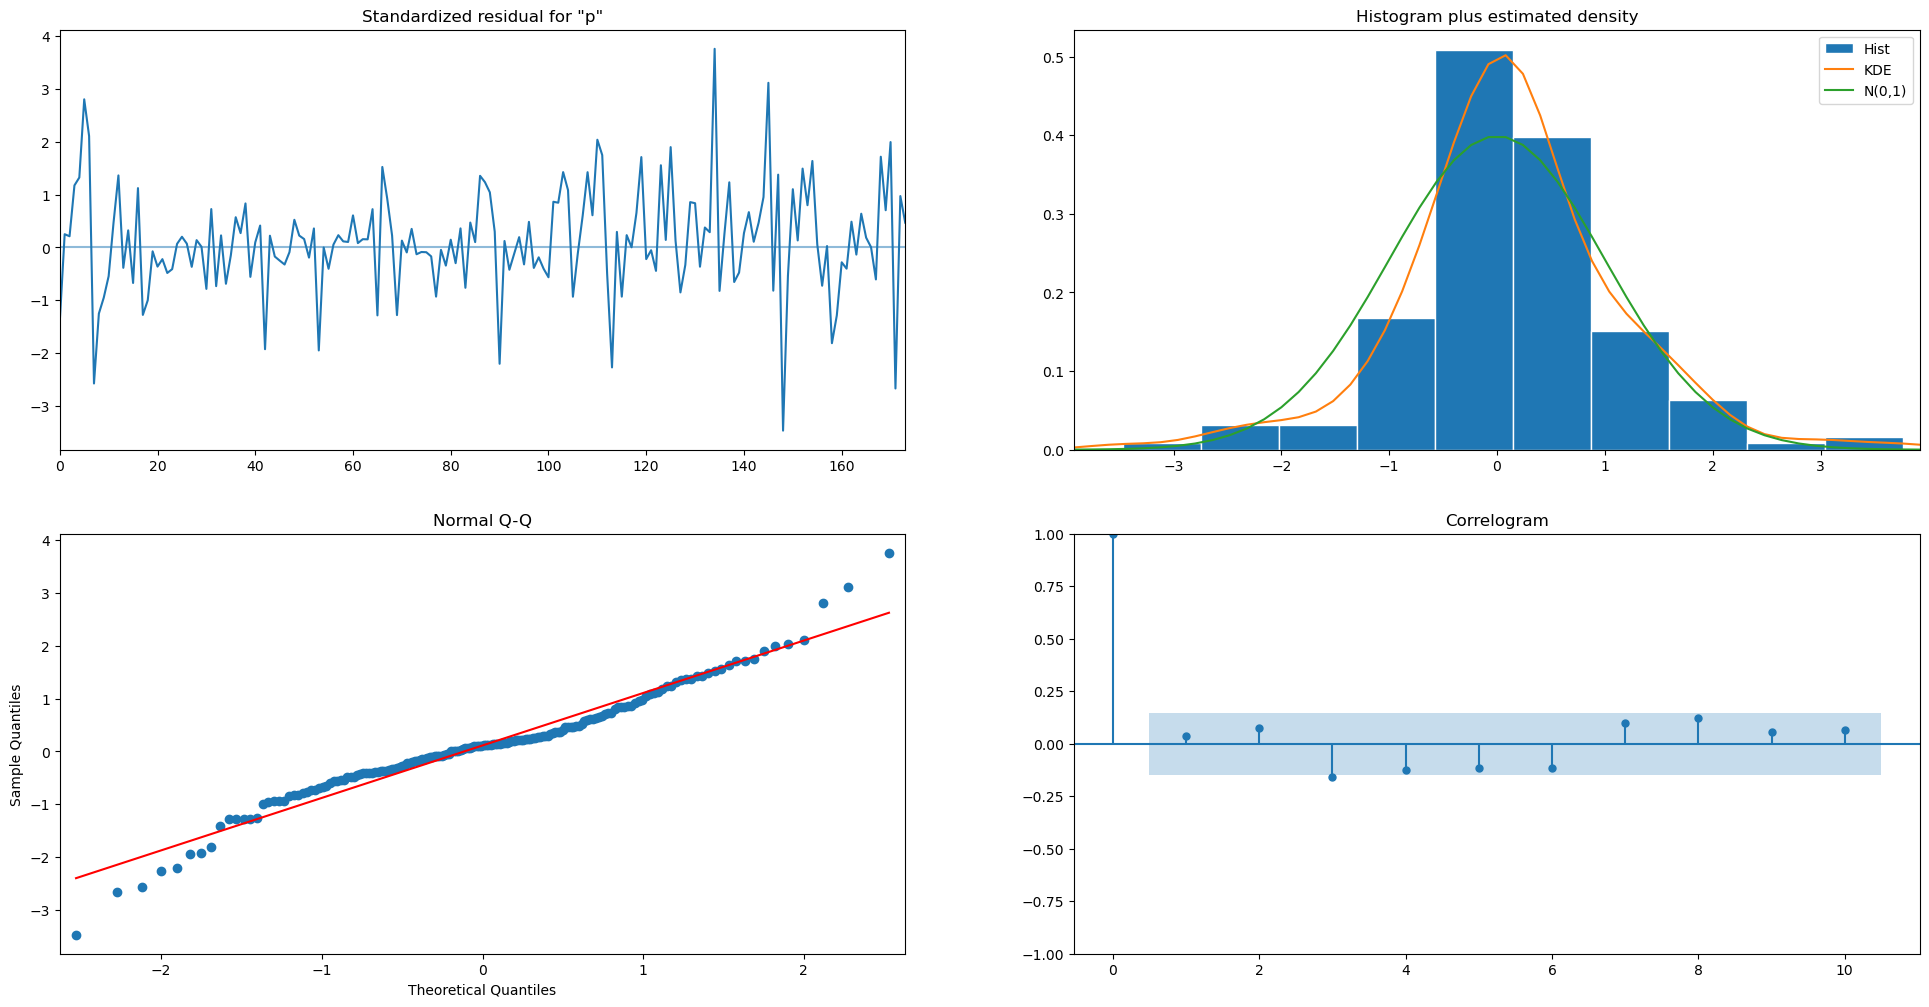

In [56]:
results_SARIMA.plot_diagnostics(figsize=(24,12))
plt.savefig('SARIMA_result.png')
plt.show()

In [57]:
final_hat_avg=test.copy()
pred_SARIMA=results_SARIMA.get_forecast(steps=len(test))
pred_SARIMA.predicted_mean

C:\Users\Mahammad Hayaz\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(


200    802.994055
201    627.893770
202    566.857502
203    524.051285
204    572.120631
205    563.611252
206    645.312920
207    715.563911
208    866.066970
209    848.097595
210    789.431604
211    740.532311
212    651.933728
213    524.460834
214    496.035648
215    475.558657
216    538.917109
217    540.876376
218    629.746060
Name: predicted_mean, dtype: float64

In [58]:
MAE_SARIMA=mean_absolute_error(test.priceMod,pred_SARIMA.predicted_mean)
MAE_SARIMA

576.3125149454931

In [59]:
MSE_SARIMA=mean_squared_error(test.priceMod,pred_SARIMA.predicted_mean,squared=False)
MSE_SARIMA

618.9432608863378

In [60]:
RMSE_SARIMA=root_mean_squared_error(test.priceMod,pred_SARIMA.predicted_mean)
RMSE_SARIMA

618.9432608863378

In [61]:
sqrt(RMSE_SARIMA)

24.878570314355642

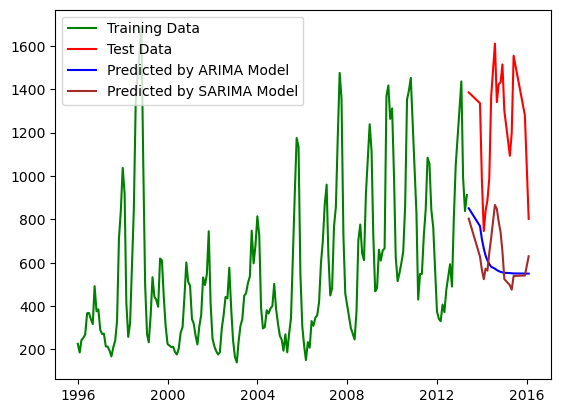

In [62]:
plt.plot(train,label='Training Data',c='green')
plt.plot(test,label='Test Data',c='red')
plt.plot(test.index,pred_ARIMA.predicted_mean,label='Predicted by ARIMA Model',c='blue')
plt.plot(test.index,pred_SARIMA.predicted_mean,label='Predicted by SARIMA Model',c='brown')
plt.legend(loc='best')
plt.savefig('TestData_by_PredictedBySARIMA.png')
plt.show()

In [63]:
from prophet import Prophet as pt

In [64]:
data_fb=df.reset_index()

In [65]:
data_fb=data_fb[['date','priceMin','priceMax','priceMod','quantity']]
data_fb

,date,priceMin,priceMax,priceMod,quantity
0,1996-01-01,160,257,226,225063
1,1996-02-01,133,229,186,196164
2,1996-03-01,155,274,243,178992
3,1996-04-01,136,279,254,192592
4,1996-05-01,154,312,269,237574
...,...,...,...,...,...
214,2015-04-01,394,1410,1093,351124
215,2015-05-01,604,1685,1198,399992
216,2015-06-01,733,1980,1554,351605
217,2015-12-01,923,1690,1280,438498


In [66]:
data_fb=data_fb.rename(columns={'date':'ds','priceMod':'y'})

In [67]:
data_fb

,ds,priceMin,priceMax,y,quantity
0,1996-01-01,160,257,226,225063
1,1996-02-01,133,229,186,196164
2,1996-03-01,155,274,243,178992
3,1996-04-01,136,279,254,192592
4,1996-05-01,154,312,269,237574
...,...,...,...,...,...
214,2015-04-01,394,1410,1093,351124
215,2015-05-01,604,1685,1198,399992
216,2015-06-01,733,1980,1554,351605
217,2015-12-01,923,1690,1280,438498


In [68]:
model=pt()

In [69]:
model_fb=model.fit(data_fb)

13:06:00 - cmdstanpy - INFO - Chain [1] start processing
13:06:00 - cmdstanpy - INFO - Chain [1] done processing


In [70]:
model_fb.seasonalities

OrderedDict([('yearly',
              {'period': 365.25,
               'fourier_order': 10,
               'prior_scale': 10.0,
               'mode': 'additive',
               'condition_name': None})])

In [71]:
future=model_fb.make_future_dataframe(periods=100,freq='M')

In [72]:
future

,ds
0,1996-01-01
1,1996-02-01
2,1996-03-01
3,1996-04-01
4,1996-05-01
...,...
314,2024-01-31
315,2024-02-29
316,2024-03-31
317,2024-04-30


In [73]:
len(future)

319

In [74]:
pred_fb=model_fb.predict(future)
pred_fb

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1996-01-01,329.875212,35.470273,684.637103,329.875212,329.875212,44.146051,44.146051,44.146051,44.146051,44.146051,44.146051,0.0,0.0,0.0,374.021263
1,1996-02-01,331.578107,-46.353749,617.716855,331.578107,331.578107,-41.544558,-41.544558,-41.544558,-41.544558,-41.544558,-41.544558,0.0,0.0,0.0,290.033549
2,1996-03-01,333.171138,-213.251952,475.968022,333.171138,333.171138,-200.624720,-200.624720,-200.624720,-200.624720,-200.624720,-200.624720,0.0,0.0,0.0,132.546418
3,1996-04-01,334.874033,-219.530389,436.421568,334.874033,334.874033,-214.825753,-214.825753,-214.825753,-214.825753,-214.825753,-214.825753,0.0,0.0,0.0,120.048280
4,1996-05-01,336.521996,-187.462553,499.889839,336.521996,336.521996,-191.936594,-191.936594,-191.936594,-191.936594,-191.936594,-191.936594,0.0,0.0,0.0,144.585403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
314,2024-01-31,1561.203430,1166.759104,1828.397716,1524.793023,1593.784826,-55.803274,-55.803274,-55.803274,-55.803274,-55.803274,-55.803274,0.0,0.0,0.0,1505.400156
315,2024-02-29,1565.589596,1074.533290,1746.326222,1528.846535,1598.707832,-177.007395,-177.007395,-177.007395,-177.007395,-177.007395,-177.007395,0.0,0.0,0.0,1388.582201
316,2024-03-31,1570.278257,1020.152385,1720.304270,1533.032115,1603.832201,-201.415600,-201.415600,-201.415600,-201.415600,-201.415600,-201.415600,0.0,0.0,0.0,1368.862657
317,2024-04-30,1574.815670,1023.724179,1708.022977,1536.935328,1608.789219,-190.903194,-190.903194,-190.903194,-190.903194,-190.903194,-190.903194,0.0,0.0,0.0,1383.912477


In [75]:
pred_fb.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'yearly', 'yearly_lower', 'yearly_upper', 'multiplicative_terms',
       'multiplicative_terms_lower', 'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [76]:
pred_fb[['ds','yhat_lower','yhat_upper','yhat']]

,ds,yhat_lower,yhat_upper,yhat
0,1996-01-01,35.470273,684.637103,374.021263
1,1996-02-01,-46.353749,617.716855,290.033549
2,1996-03-01,-213.251952,475.968022,132.546418
3,1996-04-01,-219.530389,436.421568,120.048280
4,1996-05-01,-187.462553,499.889839,144.585403
...,...,...,...,...
314,2024-01-31,1166.759104,1828.397716,1505.400156
315,2024-02-29,1074.533290,1746.326222,1388.582201
316,2024-03-31,1020.152385,1720.304270,1368.862657
317,2024-04-30,1023.724179,1708.022977,1383.912477


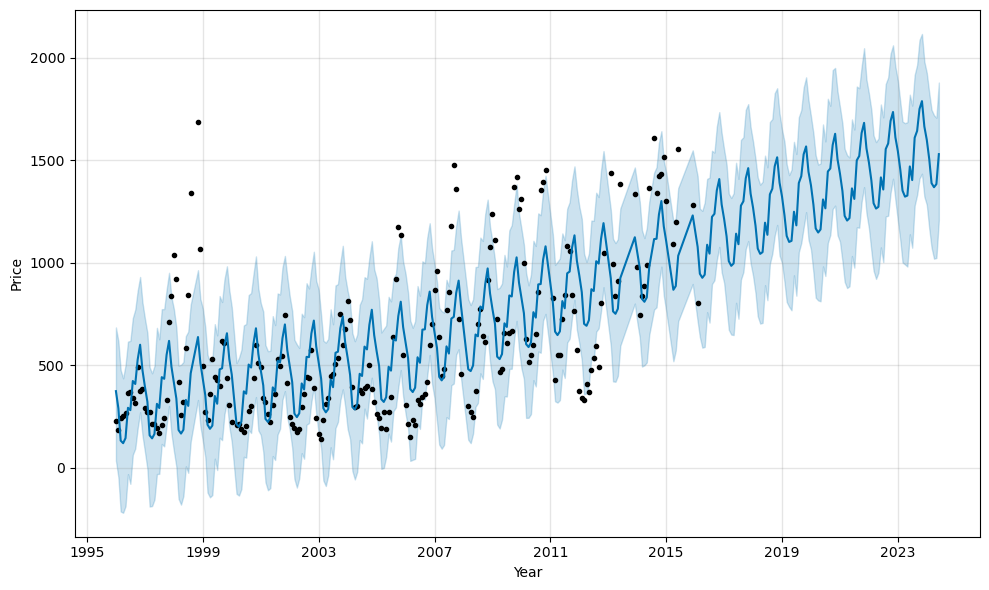

In [77]:
model_fb.plot(pred_fb,xlabel='Year',ylabel='Price')
plt.savefig('fb_model.png')
plt.show()

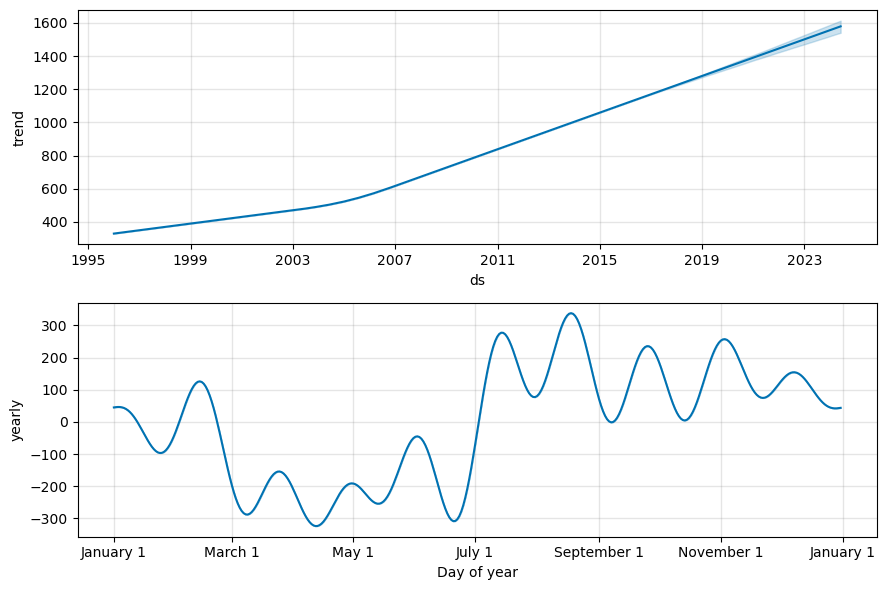

In [78]:
model_fb.plot_components(pred_fb)
plt.savefig('fb_plot_components.png')
plt.show()

In [79]:
from prophet.diagnostics import cross_validation

In [80]:
df_cv=cross_validation(model_fb,horizon='30 days',period='15 days',initial='30 days')

Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/416 [00:00<?, ?it/s]

13:06:05 - cmdstanpy - INFO - Chain [1] start processing
13:06:05 - cmdstanpy - INFO - Chain [1] done processing
13:06:05 - cmdstanpy - INFO - Chain [1] start processing
13:06:05 - cmdstanpy - INFO - Chain [1] done processing
13:06:06 - cmdstanpy - INFO - Chain [1] start processing
13:06:06 - cmdstanpy - INFO - Chain [1] done processing
13:06:06 - cmdstanpy - INFO - Chain [1] start processing
13:06:06 - cmdstanpy - INFO - Chain [1] done processing
13:06:07 - cmdstanpy - INFO - Chain [1] start processing
13:06:07 - cmdstanpy - INFO - Chain [1] done processing
13:06:07 - cmdstanpy - INFO - Chain [1] start processing
13:06:08 - cmdstanpy - INFO - Chain [1] done processing
13:06:08 - cmdstanpy - INFO - Chain [1] start processing
13:06:09 - cmdstanpy - INFO - Chain [1] done processing
13:06:09 - cmdstanpy - INFO - Chain [1] start processing
13:06:10 - cmdstanpy - INFO - Chain [1] done processing
13:06:10 - cmdstanpy - INFO - Chain [1] start processing
13:06:10 - cmdstanpy - INFO - Chain [1]

13:14:20 - cmdstanpy - INFO - Chain [1] done processing
13:14:21 - cmdstanpy - INFO - Chain [1] start processing
13:14:21 - cmdstanpy - INFO - Chain [1] done processing
13:14:21 - cmdstanpy - INFO - Chain [1] start processing
13:14:21 - cmdstanpy - INFO - Chain [1] done processing
13:14:22 - cmdstanpy - INFO - Chain [1] start processing
13:14:22 - cmdstanpy - INFO - Chain [1] done processing
13:14:22 - cmdstanpy - INFO - Chain [1] start processing
13:14:23 - cmdstanpy - INFO - Chain [1] done processing
13:14:23 - cmdstanpy - INFO - Chain [1] start processing
13:14:23 - cmdstanpy - INFO - Chain [1] done processing
13:14:24 - cmdstanpy - INFO - Chain [1] start processing
13:14:24 - cmdstanpy - INFO - Chain [1] done processing
13:14:24 - cmdstanpy - INFO - Chain [1] start processing
13:14:25 - cmdstanpy - INFO - Chain [1] done processing
13:14:25 - cmdstanpy - INFO - Chain [1] start processing
13:14:25 - cmdstanpy - INFO - Chain [1] done processing
13:14:25 - cmdstanpy - INFO - Chain [1] 

13:15:13 - cmdstanpy - INFO - Chain [1] done processing
13:15:14 - cmdstanpy - INFO - Chain [1] start processing
13:15:14 - cmdstanpy - INFO - Chain [1] done processing
13:15:14 - cmdstanpy - INFO - Chain [1] start processing
13:15:15 - cmdstanpy - INFO - Chain [1] done processing
13:15:15 - cmdstanpy - INFO - Chain [1] start processing
13:15:16 - cmdstanpy - INFO - Chain [1] done processing
13:15:16 - cmdstanpy - INFO - Chain [1] start processing
13:15:16 - cmdstanpy - INFO - Chain [1] done processing
13:15:17 - cmdstanpy - INFO - Chain [1] start processing
13:15:17 - cmdstanpy - INFO - Chain [1] done processing
13:15:17 - cmdstanpy - INFO - Chain [1] start processing
13:15:18 - cmdstanpy - INFO - Chain [1] done processing
13:15:18 - cmdstanpy - INFO - Chain [1] start processing
13:15:18 - cmdstanpy - INFO - Chain [1] done processing
13:15:19 - cmdstanpy - INFO - Chain [1] start processing
13:15:19 - cmdstanpy - INFO - Chain [1] done processing
13:15:19 - cmdstanpy - INFO - Chain [1] 

13:15:58 - cmdstanpy - INFO - Chain [1] done processing
13:15:59 - cmdstanpy - INFO - Chain [1] start processing
13:15:59 - cmdstanpy - INFO - Chain [1] done processing
13:15:59 - cmdstanpy - INFO - Chain [1] start processing
13:15:59 - cmdstanpy - INFO - Chain [1] done processing
13:15:59 - cmdstanpy - INFO - Chain [1] start processing
13:15:59 - cmdstanpy - INFO - Chain [1] done processing
13:16:00 - cmdstanpy - INFO - Chain [1] start processing
13:16:00 - cmdstanpy - INFO - Chain [1] done processing
13:16:00 - cmdstanpy - INFO - Chain [1] start processing
13:16:00 - cmdstanpy - INFO - Chain [1] done processing
13:16:00 - cmdstanpy - INFO - Chain [1] start processing
13:16:01 - cmdstanpy - INFO - Chain [1] done processing
13:16:01 - cmdstanpy - INFO - Chain [1] start processing
13:16:01 - cmdstanpy - INFO - Chain [1] done processing
13:16:01 - cmdstanpy - INFO - Chain [1] start processing
13:16:01 - cmdstanpy - INFO - Chain [1] done processing
13:16:02 - cmdstanpy - INFO - Chain [1] 

13:16:28 - cmdstanpy - INFO - Chain [1] done processing
13:16:28 - cmdstanpy - INFO - Chain [1] start processing
13:16:28 - cmdstanpy - INFO - Chain [1] done processing
13:16:28 - cmdstanpy - INFO - Chain [1] start processing
13:16:28 - cmdstanpy - INFO - Chain [1] done processing
13:16:29 - cmdstanpy - INFO - Chain [1] start processing
13:16:29 - cmdstanpy - INFO - Chain [1] done processing
13:16:29 - cmdstanpy - INFO - Chain [1] start processing
13:16:29 - cmdstanpy - INFO - Chain [1] done processing
13:16:30 - cmdstanpy - INFO - Chain [1] start processing
13:16:30 - cmdstanpy - INFO - Chain [1] done processing
13:16:30 - cmdstanpy - INFO - Chain [1] start processing
13:16:30 - cmdstanpy - INFO - Chain [1] done processing
13:16:30 - cmdstanpy - INFO - Chain [1] start processing
13:16:30 - cmdstanpy - INFO - Chain [1] done processing
13:16:31 - cmdstanpy - INFO - Chain [1] start processing
13:16:31 - cmdstanpy - INFO - Chain [1] done processing
13:16:31 - cmdstanpy - INFO - Chain [1] 

13:16:58 - cmdstanpy - INFO - Chain [1] done processing
13:16:58 - cmdstanpy - INFO - Chain [1] start processing
13:16:58 - cmdstanpy - INFO - Chain [1] done processing
13:16:59 - cmdstanpy - INFO - Chain [1] start processing
13:16:59 - cmdstanpy - INFO - Chain [1] done processing
13:16:59 - cmdstanpy - INFO - Chain [1] start processing
13:16:59 - cmdstanpy - INFO - Chain [1] done processing
13:16:59 - cmdstanpy - INFO - Chain [1] start processing
13:17:00 - cmdstanpy - INFO - Chain [1] done processing
13:17:00 - cmdstanpy - INFO - Chain [1] start processing
13:17:00 - cmdstanpy - INFO - Chain [1] done processing
13:17:00 - cmdstanpy - INFO - Chain [1] start processing
13:17:00 - cmdstanpy - INFO - Chain [1] done processing
13:17:01 - cmdstanpy - INFO - Chain [1] start processing
13:17:01 - cmdstanpy - INFO - Chain [1] done processing
13:17:01 - cmdstanpy - INFO - Chain [1] start processing
13:17:01 - cmdstanpy - INFO - Chain [1] done processing
13:17:02 - cmdstanpy - INFO - Chain [1] 

In [81]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,1996-03-01,-87.366646,-87.366648,-87.366644,243,1996-02-13
1,1996-03-01,-87.366646,-87.366648,-87.366644,243,1996-02-28
2,1996-04-01,-946.279184,-946.279185,-946.279184,254,1996-03-14
3,1996-04-01,-946.279184,-946.279185,-946.279184,254,1996-03-29
4,1996-05-01,-2044.515071,-2044.515072,-2044.515070,269,1996-04-13
...,...,...,...,...,...,...
413,2015-05-01,837.862746,508.760838,1171.817431,1198,2015-04-02
414,2015-05-01,837.862746,523.160003,1167.169042,1198,2015-04-17
415,2015-06-01,976.126797,631.744541,1309.947846,1554,2015-05-02
416,2015-12-01,1219.656682,890.018091,1543.896227,1280,2015-11-01


In [82]:
from prophet.diagnostics import performance_metrics

In [83]:
df_performance=performance_metrics(df_cv)
df_performance

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,5 days,1.024301e+06,1012.077537,470.833082,1.352936,0.389249,0.595878,0.707317
1,6 days,1.141564e+06,1068.440184,491.585781,1.374510,0.489075,0.569746,0.658537
2,7 days,4.813192e+05,693.771717,328.032686,0.944566,0.391587,0.515196,0.688153
3,8 days,1.363261e+06,1167.587724,429.275779,1.306616,0.406986,0.512758,0.648084
4,9 days,1.104372e+06,1050.891047,371.056054,1.023285,0.328954,0.510750,0.577744
5,10 days,7.257620e+05,851.916668,322.210815,0.788164,0.357284,0.471374,0.572062
6,11 days,9.142746e+04,302.369742,237.001004,0.492540,0.372369,0.434200,0.588235
7,12 days,1.483545e+05,385.168179,282.339918,0.525559,0.389747,0.461778,0.583931
8,13 days,2.126452e+05,461.134659,336.940822,0.537850,0.389747,0.525289,0.546341
9,14 days,2.430608e+05,493.012005,369.232899,0.539602,0.309682,0.489180,0.536585


In [84]:
MSE_pb=df_performance['mse'].mean()
RMSE_pb=df_performance['rmse'].mean()
MAE_pb=df_performance['mae'].mean()

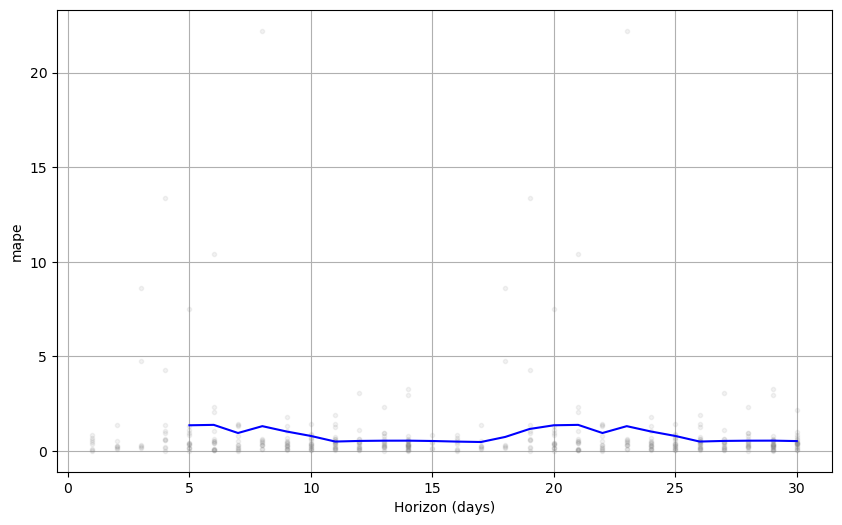

In [85]:
from prophet.plot import plot_cross_validation_metric
plot_cross_validation_metric(df_cv,metric='mape')
plt.show()

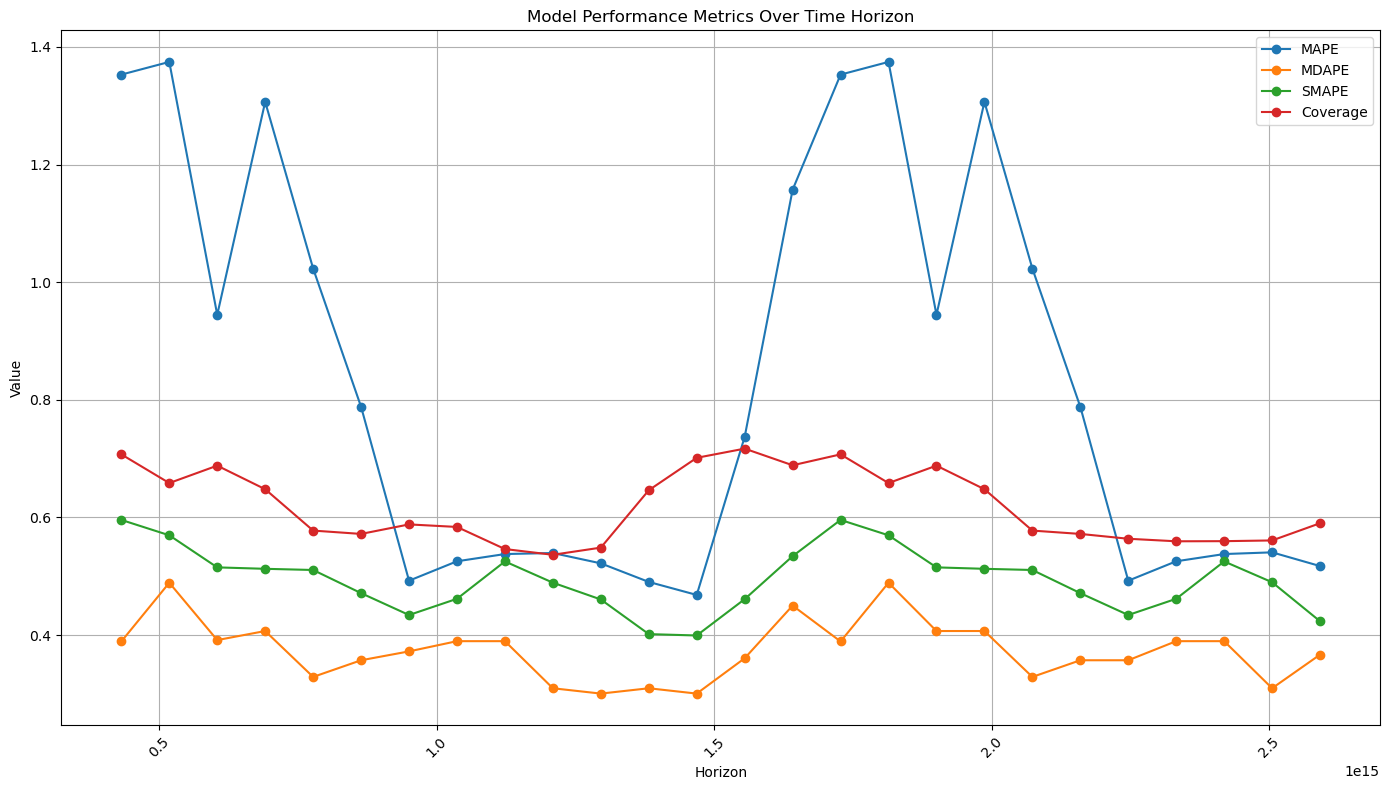

In [86]:
df_performance

# Plotting
plt.figure(figsize=(14, 8))
#plt.plot(df_performance['horizon'], df_performance['mse'], marker='o', label='MSE')
#plt.plot(df_performance['horizon'], df_performance['rmse'], marker='o', label='RMSE')
#plt.plot(df_performance['horizon'], df_performance['mae'], marker='o', label='MAE')
plt.plot(df_performance['horizon'], df_performance['mape'], marker='o', label='MAPE')
plt.plot(df_performance['horizon'], df_performance['mdape'], marker='o', label='MDAPE')
plt.plot(df_performance['horizon'], df_performance['smape'], marker='o', label='SMAPE')
plt.plot(df_performance['horizon'], df_performance['coverage'], marker='o', label='Coverage')

plt.title('Model Performance Metrics Over Time Horizon')
plt.xlabel('Horizon')
plt.ylabel('Value')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()

plt.show()

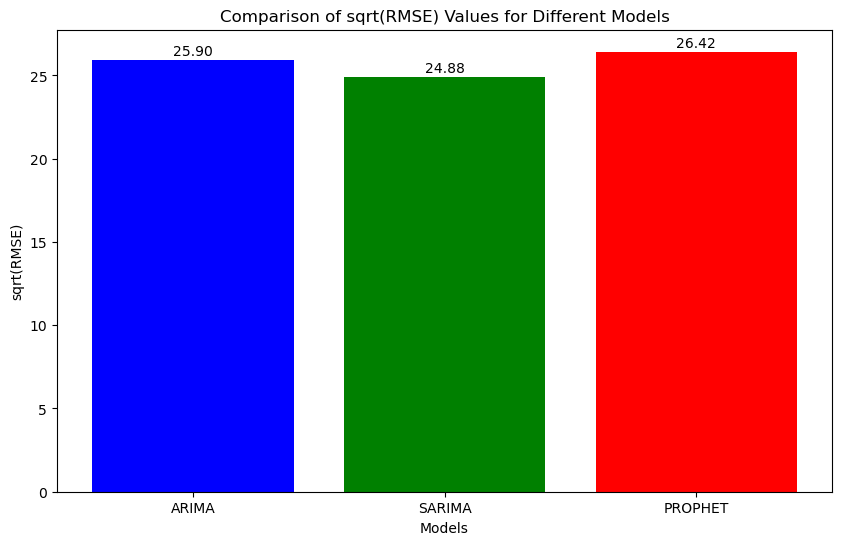

In [87]:
import matplotlib.pyplot as plt
import numpy as np

# Models and their sqrt(RMSE) values
models = ['ARIMA', 'SARIMA', 'PROPHET']
sqrt_RMSE = [np.sqrt(RMSE_ARIMA), np.sqrt(RMSE_SARIMA), np.sqrt(RMSE_pb)]

# Plotting the bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, sqrt_RMSE, color=['blue', 'green', 'red'])

# Adding titles and labels
plt.title('Comparison of sqrt(RMSE) Values for Different Models')
plt.xlabel('Models')
plt.ylabel('sqrt(RMSE)')

# Displaying the values on top of the bars
for i, value in enumerate(sqrt_RMSE):
    plt.text(i, value + 0.1, f'{value:.2f}', ha='center', va='bottom')
    
plt.savefig('Comparison of sqrt(RMSE) Values for Different Models.png')

plt.show()

### Model Comparison and Selection

The performance of different models was evaluated using the square root of the Root Mean Squared Error (sqrt(RMSE)). Lower `sqrt(RMSE)` values indicate better model performance with smaller prediction errors.

- **ARIMA**: 25.90
- **SARIMA**: 24.88
- **PROPHET**: 26.42

Among the models tested, the **SARIMA** model exhibited the best performance with the lowest `sqrt(RMSE)` value of 24.88, indicating it has the smallest prediction error and is therefore the best model for our dataset.


#### Save The Finalized Model

In [88]:
import pickle

#model_SARIMA
with open('model_SARIMA.pkl', 'wb') as f:
    pickle.dump(model_SARIMA, f)
